<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install pytesseract

In [8]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

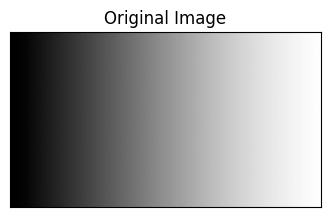

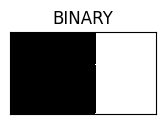

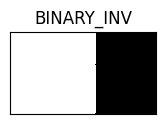

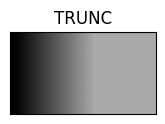

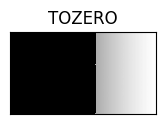

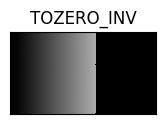

In [12]:
filename = ('/content/drive/MyDrive/image_thres/gradient.jpg')
img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255   #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1   #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh    #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0    #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0    #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
  plt.show()

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/ktpRiyanto.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
def otsu(gray):
pixel_number = gray.shape[0] * gray.shape[1]
             mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8
range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh
otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()